In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
ls

customer_churn.csv*        lab_imbalanced_data.ipynb


In [37]:
df = pd.read_csv('customer_churn.csv')
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
data = pd.DataFrame(round(df.isna().sum()/len(df),4)*100) 
data

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges

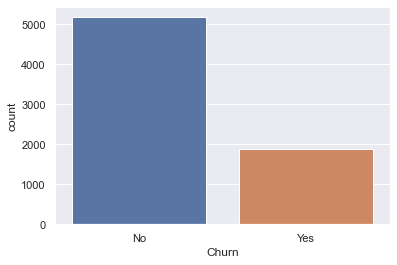

In [44]:
sns.set_theme(style="darkgrid")
#df = sns.load_dataset("df")
sns.countplot(x='Churn',data=df)  
plt.show()  

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [45]:
numeric = df.select_dtypes(include = ['number'])
numeric

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [47]:
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(numeric) 
x_normalized = MinMaxtransformer.transform(numeric) 
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_normalized),x_normalized.shape))
x_normalized = pd.DataFrame(x_normalized,columns=numeric.columns) 
x_normalized.head()

The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (7043, 3)


,SeniorCitizen,tenure,MonthlyCharges
0,0.0,0.013889,0.115423
1,0.0,0.472222,0.385075
2,0.0,0.027778,0.354229
3,0.0,0.625000,0.239303
4,0.0,0.027778,0.521891


In [48]:
x_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.0,0.000000,0.000000,0.000000,1.0
tenure,7043.0,0.449599,0.341104,0.0,0.125000,0.402778,0.763889,1.0
MonthlyCharges,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0


In [50]:
Standardtransformer = StandardScaler()
Standardtransformer.fit(numeric)
x_standardized = Standardtransformer.transform(numeric) 
print("The numpy array looks like this: ",x_standardized)
print("The type of x_normalized is {} and the shape of the array is {}".format(type(x_standardized),x_standardized.shape))
x_standardized = pd.DataFrame(x_standardized,columns=numeric.columns)
x_standardized.head()

The numpy array looks like this:  [[-0.43991649 -1.27744458 -1.16032292]
 [-0.43991649  0.06632742 -0.25962894]
 [-0.43991649 -1.23672422 -0.36266036]
 ...
 [-0.43991649 -0.87024095 -1.1686319 ]
 [ 2.27315869 -1.15528349  0.32033821]
 [-0.43991649  1.36937906  1.35896134]]
The type of x_normalized is <class 'numpy.ndarray'> and the shape of the array is (7043, 3)


,SeniorCitizen,tenure,MonthlyCharges
0,-0.439916,-1.277445,-1.160323
1,-0.439916,0.066327,-0.259629
2,-0.439916,-1.236724,-0.362660
3,-0.439916,0.514251,-0.746535
4,-0.439916,-1.236724,0.197365


In [51]:
x_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,6.417792e-16,1.000071,-0.439916,-0.439916,-0.439916,-0.439916,2.273159
tenure,7043.0,5.945991e-17,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
MonthlyCharges,7043.0,-8.291599e-17,1.000071,-1.545860,-0.972540,0.185733,0.833833,1.794352


In [52]:
pd.concat([numeric,x_normalized,x_standardized],axis=1)

,SeniorCitizen,tenure,MonthlyCharges,SeniorCitizen,tenure,MonthlyCharges,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85,0.0,0.013889,0.115423,-0.439916,-1.277445,-1.160323
1,0,34,56.95,0.0,0.472222,0.385075,-0.439916,0.066327,-0.259629
2,0,2,53.85,0.0,0.027778,0.354229,-0.439916,-1.236724,-0.362660
3,0,45,42.30,0.0,0.625000,0.239303,-0.439916,0.514251,-0.746535
4,0,2,70.70,0.0,0.027778,0.521891,-0.439916,-1.236724,0.197365
...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,0.0,0.333333,0.662189,-0.439916,-0.340876,0.665992
7039,0,72,103.20,0.0,1.000000,0.845274,-0.439916,1.613701,1.277533
7040,0,11,29.60,0.0,0.152778,0.112935,-0.439916,-0.870241,-1.168632
7041,1,4,74.40,1.0,0.055556,0.558706,2.273159,-1.155283,0.320338


In [53]:
y = pd.DataFrame(data=df, columns=['Churn'])
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [54]:
y['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [56]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns

encoder = OneHotEncoder()
encoder.fit(y) 
print(encoder.categories_)
encoded = encoder.transform(y).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head(20)

[array(['No', 'Yes'], dtype=object)]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,No,Yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
8,0.0,1.0
9,1.0,0.0


In [59]:
df1 = df['Churn'] 
df1.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [62]:
label_encoder = LabelEncoder()
label_encoder.fit(y)
X_cat_trans = label_encoder.transform(y) # ordered wrt value counts
X_cat_trans = pd.DataFrame(X_cat_trans,columns=y.columns)
display(X_cat_trans.head(20))
X_cat_trans['Churn'].value_counts()

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Churn
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


0    5174
1    1869
Name: Churn, dtype: int64

In [63]:
#let merge all the information
X = pd.concat([x_normalized, onehot_encoded], axis=1)

In [64]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,"(No,)","(Yes,)"
0,0.0,0.013889,0.115423,1.0,0.0
1,0.0,0.472222,0.385075,1.0,0.0
2,0.0,0.027778,0.354229,0.0,1.0
3,0.0,0.625000,0.239303,1.0,0.0
4,0.0,0.027778,0.521891,0.0,1.0


In [65]:
y = onehot_encoded
y

,No,Yes
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
7038,1.0,0.0
7039,1.0,0.0
7040,1.0,0.0
7041,0.0,1.0


In [67]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
print("X_train is: ",X_train.shape)
print("X_test is: ", X_test.shape)
print("y_train is: ",y_train.shape)
print("y_test is: ",y_test.shape)

X_train is:  (5634, 5)
X_test is:  (1409, 5)
y_train is:  (5634, 2)
y_test is:  (1409, 2)


In [73]:
y_test.head()

,No,Yes
185,0.0,1.0
2715,1.0,0.0
3825,1.0,0.0
1807,0.0,1.0
132,1.0,0.0


In [76]:
lm = LinearRegression()
lm.fit(X_train,y_train)

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [78]:
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [79]:
y_pred_test = lm.predict(X_test)
r2_score(y_test, y_pred_test)

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [81]:
# Comptuing the RMSE -> root mean squared error.
np.sqrt(mean_squared_error(y_test,y_pred_test))

4.635747226631376e-16

In [82]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

4.635747226631376e-16

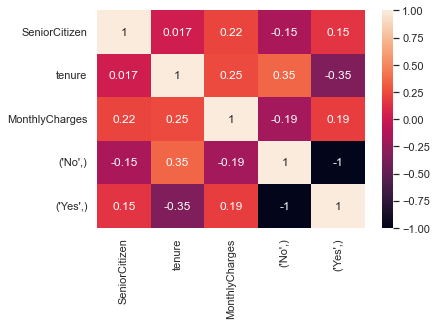

In [83]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [89]:
transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)

X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


,SeniorCitizen,tenure,MonthlyCharges,"(No,)","(Yes,)"
2142,-0.437749,-0.465683,-0.000474,0.601271,-0.601271
1623,-0.437749,0.885537,1.074754,0.601271,-0.601271
6074,-0.437749,-1.284605,-1.376499,-1.663142,1.663142
1362,-0.437749,-1.161766,0.177346,-1.663142,1.663142
6754,-0.437749,-1.325551,-0.098524,0.601271,-0.601271


In [94]:
type(y_train)

pandas.core.frame.DataFrame

In [98]:
y_train = y_train.reset_index(drop=True) 

In [99]:
y_test = y_test.reset_index(drop=True) 

In [100]:


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [101]:
lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

/Users/maryramirez/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


ValueError: y should be a 1d array, got an array of shape (5282, 2) instead.

In [102]:
lr.predict_proba(X_train_scaled)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [88]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train) 

AttributeError: 'DataFrame' object has no attribute 'argmax'

In this part, i couldn't advance. I do not know how to change the y_train array.